<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [3]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [67]:
hapiness_freedom_notnull = df[~df['Freedom'].isnull()]

Посмотреть первые несколько рядов таблицы

In [114]:
df.head(20)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [119]:
df[df['Country (region)'].isin(['Russia', 'Cuba'])]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
67,Russia,68,64,96.0,9.0,40.0,107.0,127.0,101.0,45.0,89.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

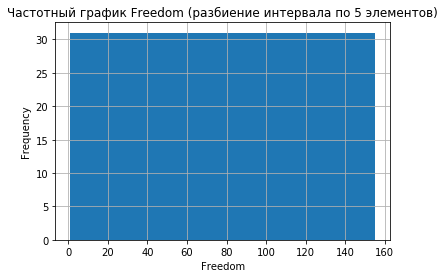

In [44]:
hist_Freedom = plt.hist(df['Freedom'], 5
#                         , facecolor='g'
                       )

plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.title('Частотный график Freedom (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

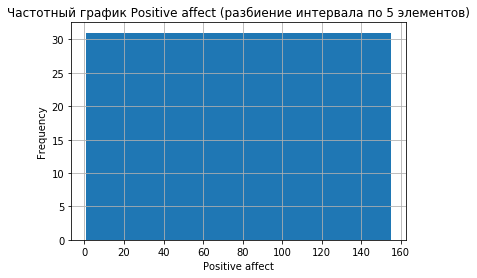

In [48]:
fist_Positive = plt.hist(df['Positive affect'], 5)

plt.xlabel('Positive affect')
plt.ylabel('Frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

In [51]:
print('Данные по Freedom и Positive affect относятся к равномерному распределению')

Данные по Freedom и Positive affect относятся к равномерному распределению


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [75]:
med_Freedom = statistics.median(hapiness_freedom_notnull['Freedom'])
print ('Медиана: ', med_Freedom)

Медиана:  78.0


In [76]:
avg_Freedom = statistics.mean(hapiness_freedom_notnull['Freedom'])
print ('Математическое ожидание: ', avg_Freedom)

Математическое ожидание:  78.0


In [77]:
stdev_Freedom = statistics.pstdev(hapiness_freedom_notnull['Freedom'])
print ('Стандартное отклонение: ', stdev_Freedom)

Стандартное отклонение:  44.74371464239419


In [78]:
var_Freedom = statistics.pvariance(hapiness_freedom_notnull['Freedom'])
print ('Дисперсия: ', var_Freedom)

Дисперсия:  2002.0


In [83]:
min_Freedom = min(hapiness_freedom_notnull['Freedom'])
print ('Минимум: ', min_Freedom)
max_Freedom = max(hapiness_freedom_notnull['Freedom'])
print ('Максимум: ', max_Freedom)

Минимум:  1.0
Максимум:  155.0


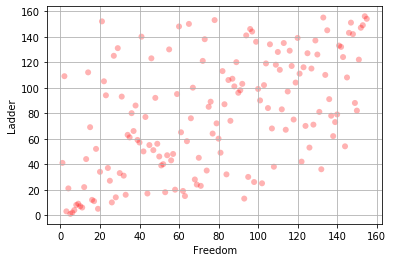

In [89]:
freedom = hapiness_freedom_notnull['Freedom']
ladder = hapiness_freedom_notnull['Ladder']
fig, ax = plt.subplots()
ax.scatter(freedom, ladder, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

In [86]:
print('Выбросов нет')

Выбросов нет


In [87]:
R_Freedom = max_Freedom - min_Freedom
print ('Размах: ', R_Freedom)

Размах:  154.0


Почему нельзя найти моду?

In [88]:
print ('Моду найти нельзя, так как значения не повторяются')

Моду найти нельзя, так как значения не повторяются


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

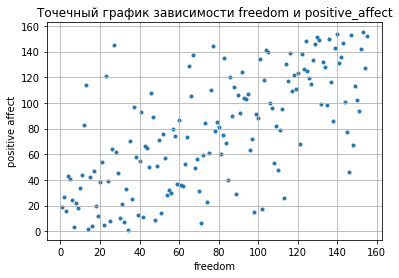

In [94]:
positive_affect = hapiness_freedom_notnull['Positive affect']
plt.xlabel('freedom')
plt.ylabel('positive affect')
plt.title('Точечный график зависимости freedom и positive_affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [95]:
print ('На графике можно заметить прямую корреляцию между freedom и positive_affect')

На графике можно заметить прямую корреляцию между freedom и positive_affect


In [100]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона равен: ', corr)
print ('Что подтверждает справедливость наблюдения, сделанного на основании просмотра графика. Корреляция заметна.')

Коэффициент корреляции Пирсона равен:  0.6817698430601657
Что подтверждает справедливость наблюдения, сделанного на основании просмотра графика. Корреляция заметна.


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [106]:
freedom_minus_avg = freedom - avg_Freedom
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_norm = min_max_scaler.fit_transform(np.array(freedom_minus_avg).reshape(-1, 1))

Построить матрицу корреляций для всех колонок таблицы

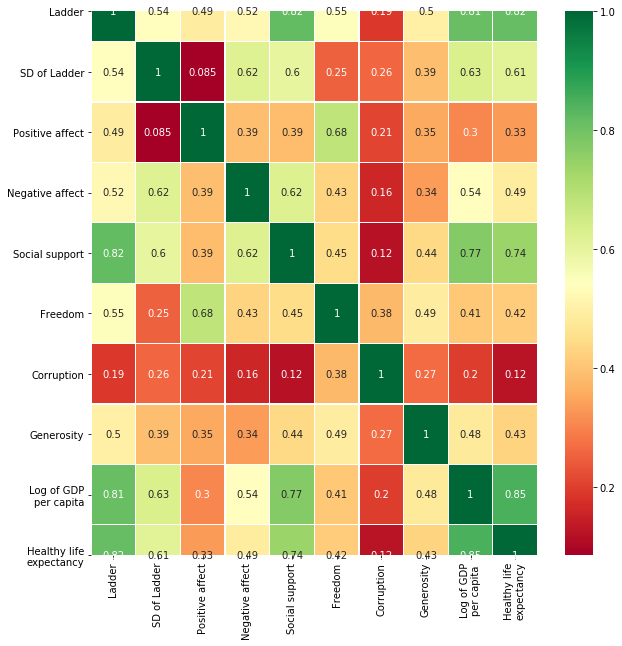

In [113]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(10,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [137]:
import io
avocado = "avocado.csv"
avocado_df = pd.read_csv(avocado)
avocado_df[:9]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

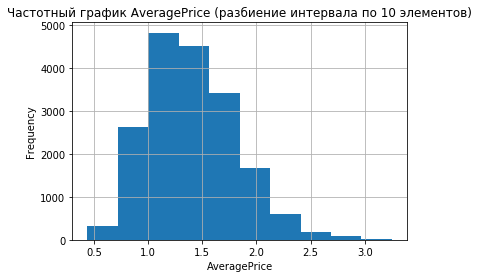

In [124]:
hist_price = plt.hist(avocado_df['AveragePrice'], 10)

plt.xlabel('AveragePrice')
plt.ylabel('Frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [125]:
print('Данные по AveragePrice распределены нормально')

Данные по AveragePrice распределены нормально


Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [135]:
corr_4046AveragePrice = pearsonr(avocado_df['4046'], avocado_df['AveragePrice'])
corr_4225AveragePrice = pearsonr(avocado_df['4225'], avocado_df['AveragePrice'])
corr_4770AveragePrice = pearsonr(avocado_df['4770'], avocado_df['AveragePrice'])
print ('Корреляция между 4046 и Average Price', corr_4046AveragePrice[0])
print ('Корреляция между 4225 и Average Price',corr_4225AveragePrice[0])
print ('Корреляция между 4770 и Average Price',corr_4770AveragePrice[0])

Корреляция между 4046 и Average Price -0.2083170484878848
Корреляция между 4225 и Average Price -0.17292777250933541
Корреляция между 4770 и Average Price -0.1794459839797562


In [136]:
print ('Между 4046, 4225, 4770 и Average Price корреляция очень слабая')

Между 4046, 4225, 4770 и Average Price корреляция очень слабая
